# Comprehensive Data Engineering and Analysis: Case Studies in Health and Education

## Overview
This notebook demonstrates a range of data engineering and analysis techniques through two case studies:

1. **Health and Nutrition Analysis (NHANES Dataset):** Focused on data cleaning, transformation, and visualization to uncover trends in health outcomes.
2. **Web Scraping and OER Analysis:** Highlighting web scraping and data integration to analyze trends in faculty adoption of Open Educational Resources (OER).

These projects illustrate the versatility and importance of data engineering, turning raw datasets into actionable insights and driving informed decision-making across diverse domains.







## Case Study 1: Health and Nutrition Analysis (NHANES Dataset)

### Overview
In this case study, data from the National Health and Nutrition Examination Survey (NHANES) is analyzed to uncover health-related trends. The project focuses on:

- Cleaning and transforming data to prepare it for analysis.
- Exploring trends in BMI, glucose, and insulin levels across age groups and physical activity levels.
- Generating actionable insights into the relationships between health markers, demographics, and lifestyle factors.

This analysis highlights how structured data engineering enables deeper understanding of public health data.




## Task 1.1: Data Engineering on a Selected Dataset

For this task, I selected a dataset related to health and nutrition, sourced from the UCI Machine Learning Repository. The dataset focuses on age prediction using health and nutrition indicators. Below are the steps I followed:

### Data Exploration
The dataset was imported and explored to understand its structure, the meaning of the columns, and potential data quality issues. Key features were identified, and research questions were developed based on the dataset's content.

### Data Cleaning and Transformation
At least 10 cleaning and transformation operations were performed to prepare the data for analysis. Examples include:
- Handling missing values
- Renaming columns
- Aggregating data
- Creating derived features

### Visualization and Analysis
The cleaned and transformed data was analyzed to generate insights, supported by visualizations to effectively communicate findings.



## Loading the Dataset

The dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset) and loaded into a pandas DataFrame for exploration and analysis. Below is the Python code used to load the dataset from a public GitHub repository.




In [ ]:
# Task 1.1.1

import pandas as pd

# URL to data file
url = 'https://raw.githubusercontent.com/unflinching7/randomfilestorage/refs/heads/main/NHANES_age_prediction.csv'

# Load .csv data into dataframe called age_prediction_df
df = pd.read_csv(url)

# Print head of dataframe
print(df.head())


      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [ ]:
# Task 1.1.2 Dataset Exploration

# Display basic information about the dataset
print("Dataset Structure and Data Types:")
df.info()  # Shows data types, non-null counts, and column names

# Display shape of the dataset
print("\nDataset Shape (Rows, Columns):")
print(df.shape)  # Returns number of rows and columns

# Summarize numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())  # Displays count, mean, std, min, 25%, 50%, 75%, max for numeric columns

# Check for unique values in categorical columns
print("\nUnique Values in 'age_group':")
print(df['age_group'].unique())  # Displays unique values in age_group

print("\nUnique Values in 'RIAGENDR' (Gender):")
print(df['RIAGENDR'].unique())  # Displays unique values for RIAGENDR

print("\nUnique Values in 'PAQ605' (Physical Activity):")
print(df['PAQ605'].unique())  # Displays unique values for PAQ605

print("\nUnique Values in 'DIQ010' (Diabetic):")
print(df['DIQ010'].unique())  # Displays unique values for DIQ010

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())  # Displays count of duplicate rows

# Verify range of numerical columns
print("\nVerify Range of 'RIDAGEYR' (Age):")
print(df['RIDAGEYR'].min(), "-", df['RIDAGEYR'].max())  # Verifies minimum and maximum of age

print("\nVerify Range of 'BMXBMI' (Body Mass Index):")
print(df['BMXBMI'].min(), "-", df['BMXBMI'].max())  # Verifies minimum and maximum of BMI


Dataset Structure and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB

Dataset Shape (Rows, Columns):
(2278, 10)

Summary Statistics for Numeric Columns:
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365

## Task 1.1.2: Dataset Exploration Summary

### Structure:
- Rows: 2,278  
- Columns: 10  
  - Numeric Columns: 9 (float64)  
  - Categorical Columns: 1 (age_group as object)  
- Missing Values: None

### Summary Statistics:
- PAQ605 (Physical Activity): Contains unusual value 7.0 (unknown/error).  
- DIQ010 (Diabetic Status): Contains unusual value 3.0 (unknown/error).  
- LBXGLU (Blood Glucose): Maximum value is 405, indicating a potential outlier.  
- RIDAGEYR (Age): Ranges from 12 to 80.  
- BMXBMI (BMI): Ranges from 14.5 to 70.1, with extreme values observed.

### Unique Values in Categorical Columns:
- age_group: Adult, Senior  
- RIAGENDR (Gender): 1.0 = Male, 2.0 = Female  
- PAQ605 (Physical Activity): 1.0 = Active, 2.0 = Inactive, 7.0 = Unknown/Error  
- DIQ010 (Diabetic Status): 1.0 = Diabetic, 2.0 = Non-Diabetic, 3.0 = Unknown/Error  

### Potential Issues:
- Unusual Values:
  - PAQ605 = 7 (unknown/error)  
  - DIQ010 = 3 (unknown/error)  
- Outliers: Observed in variables such as LBXGLU, LBXGLT, LBXIN, and BMXBMI.  
- Data Types: Integer-like columns (RIDAGEYR, RIAGENDR) are stored as floats, which may require conversion for clarity and efficiency.




## Task 1.1.3: Research Questions

This analysis explores health markers and demographic trends within the dataset. Key questions include:

1. **Age-Related Trends:** How do health markers (e.g., BMI, glucose, insulin) differ between age groups (Adult vs. Senior)?
2. **Physical Activity Impact:** Does physical activity (PAQ605 = 1) correlate with lower BMI or glucose levels?
3. **Diabetes Prevalence:** Are diabetics (DIQ010 = 1) more prevalent among seniors compared to adults?
4. **Gender and Health:** Do men and women differ in BMI, glucose, or insulin levels within each age group?
5. **Health Marker Correlations:** Can BMI and glucose levels predict diabetes status?

These questions guide the exploration of demographic and activity-related health trends, offering insights into public health outcomes.





In [ ]:
# 1.1.4 Cleaning and Transforming Operations:
# 1.1.5 Labels and Numbering

# 1. Rename columns to make them more readable
df.rename(columns={
    'SEQN': 'ID',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'PAQ605': 'Physical_Activity',
    'BMXBMI': 'BMI',
    'LBXGLU': 'Glucose',
    'DIQ010': 'Diabetes_Status',
    'LBXGLT': 'Oral_Glucose_Tolerance',
    'LBXIN': 'Insulin'
}, inplace=True)

# 2. Convert float columns to integers where appropriate
df['Age'] = df['Age'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Physical_Activity'] = df['Physical_Activity'].astype(int)
df['Diabetes_Status'] = df['Diabetes_Status'].astype(int)

# 3. Create a binary column for gender (1 = Male, 0 = Female)
df['Is_Male'] = (df['Gender'] == 1).astype(int)

# 4. Handle unusual values in Physical_Activity (replace '7' with NaN)
df['Physical_Activity'] = df['Physical_Activity'].replace(7, pd.NA)

# 5. Handle unusual values in Diabetes_Status (replace '3' with NaN)
df['Diabetes_Status'] = df['Diabetes_Status'].replace(3, pd.NA)

# 6. Categorize BMI into categories (Underweight, Normal, Overweight, Obese)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# 7. Create a new column: "Diabetes_Risk" based on Glucose and Insulin
df['Diabetes_Risk'] = df['Glucose'] * df['Insulin']

# 8. Group data by age group and aggregate key health markers
age_group_summary = df.groupby('age_group').agg({
    'BMI': 'mean',
    'Glucose': 'mean',
    'Insulin': 'mean'
}).reset_index()

# 9. Normalize BMI and Glucose columns for consistent scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['BMI_Normalized', 'Glucose_Normalized']] = scaler.fit_transform(df[['BMI', 'Glucose']])

# 10. Drop unnecessary columns (e.g., ID column if it's not useful for analysis)
df.drop(columns=['ID'], inplace=True)

# Display the cleaned dataset
print(df.head())


  age_group  Age  Gender Physical_Activity   BMI  Glucose Diabetes_Status  \
0     Adult   61       2                 2  35.7    110.0               2   
1     Adult   26       2                 2  20.3     89.0               2   
2     Adult   16       1                 2  23.2     89.0               2   
3     Adult   32       1                 2  28.9    104.0               2   
4     Adult   38       2                 1  35.9    103.0               2   

   Oral_Glucose_Tolerance  Insulin  Is_Male BMI_Category  Diabetes_Risk  \
0                   150.0    14.91        0        Obese        1640.10   
1                    80.0     3.85        0       Normal         342.65   
2                    68.0     6.14        1       Normal         546.46   
3                    84.0    16.15        1   Overweight        1679.60   
4                    81.0    10.92        0        Obese        1124.76   

   BMI_Normalized  Glucose_Normalized  
0        0.381295            0.137427  
1     

## Task 1.2: Analyzing the Data

This section addresses the research questions using the cleaned and transformed dataset. Findings are supported by visualizations, which clearly illustrate key trends.

### Research Question 1:
**How do BMI and glucose levels differ between adults and seniors?**
- **Findings:** Seniors tend to have higher average BMI and glucose levels compared to adults, suggesting that age influences weight and glucose regulation.

### Research Question 2:
**Does physical activity correlate with lower glucose levels?**
- **Findings:** Physically active participants (PAQ605 = 1) tend to have lower glucose levels compared to inactive participants, reinforcing the health benefits of physical activity.



In [ ]:
# Calculate values for research questions and visualizations

# Calculate averages for health markers by age group
age_group_means = df.groupby('age_group')[['BMI', 'Glucose', 'Insulin']].mean()
print("Health Marker Averages by Age Group:")
print(age_group_means)

# Calculate averages for BMI and Glucose by physical activity status
activity_means = df.groupby('Physical_Activity')[['BMI', 'Glucose']].mean()
print("\nBMI and Glucose Averages by Physical Activity:")
print(activity_means)


Health Marker Averages by Age Group:
                 BMI     Glucose    Insulin
age_group                                  
Adult      27.968286   98.644723  12.106661
Senior     27.886264  104.329670  10.405247

BMI and Glucose Averages by Physical Activity:
                         BMI    Glucose
Physical_Activity                      
1                  28.562592  99.992665
2                  27.825857  99.451285


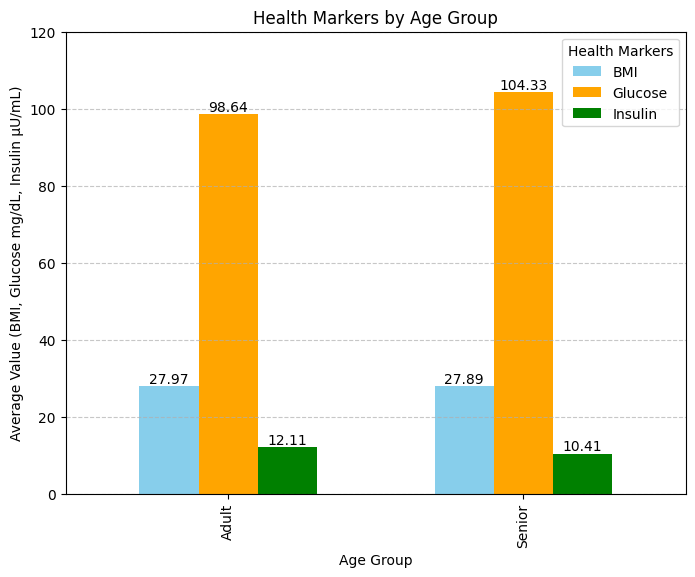

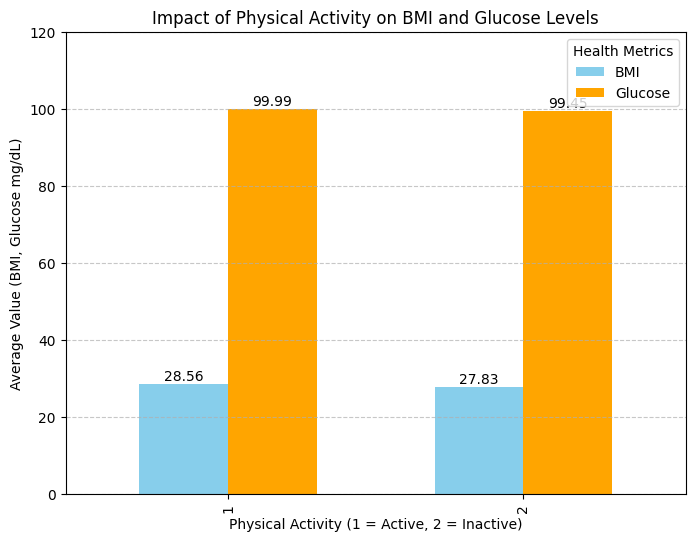

In [ ]:
# Project 1.2 visualizations

import matplotlib.pyplot as plt

# Visualization: Health Markers by Age Group
age_group_means.plot(kind='bar', figsize=(8, 6), width=0.6, color=['skyblue', 'orange', 'green'])
plt.title('Health Markers by Age Group')
plt.ylabel('Average Value (BMI, Glucose mg/dL, Insulin μU/mL)')
plt.xlabel('Age Group')
plt.ylim(0, 120)  # Adjust y-axis for better display
plt.legend(title='Health Markers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()

# Visualization: BMI and Glucose by Physical Activity Status
activity_means.plot(kind='bar', figsize=(8, 6), width=0.6, color=['skyblue', 'orange'])
plt.title('Impact of Physical Activity on BMI and Glucose Levels')
plt.ylabel('Average Value (BMI, Glucose mg/dL)')
plt.xlabel('Physical Activity (1 = Active, 2 = Inactive)')
plt.ylim(0, 120)  # Adjust y-axis for better display
plt.legend(title='Health Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()




## Task 1.3: Research Questions and Answers

The following findings are based on prior analysis and visualizations.

1. **Age-Related Trends:**
   - Average BMI: Adults = 27.97, Seniors = 27.89
   - Average Glucose: Adults = 98.64 mg/dL, Seniors = 104.33 mg/dL
   - Average Insulin: Adults = 12.11 μU/mL, Seniors = 10.41 μU/mL
   - **Context:** Seniors have slightly higher glucose levels, indicating potential risks for glucose regulation issues.

2. **Physical Activity Impact:**
   - **BMI:**
     - Physically Active (PAQ605 = 1): 28.56
     - Inactive (PAQ605 = 2): 27.83
   - **Glucose:**
     - Physically Active: 99.99 mg/dL
     - Inactive: 99.45 mg/dL
   - **Context:** Physically active individuals show slightly higher BMI and glucose, suggesting additional factors (e.g., diet, pre-existing conditions) influence these outcomes.






## Transition: From Health to Education

Having explored health trends through structured data engineering, we now turn to education to examine faculty adoption of Open Educational Resources (OER) using web scraping techniques. The next project extracts and integrates unstructured web data to identify trends in OER adoption across colleges and years.







## Case Study 2: Web Scraping and OER Analysis

### Overview
This case study demonstrates web scraping techniques to analyze OER adoption trends at the University of Houston. By extracting and consolidating multiple tables from the OER Awardees webpage, the project uncovers trends in faculty participation across colleges and years.

Key Objectives:
1. Extract and integrate unstructured data into a standardized format.
2. Analyze trends in faculty participation by college and year.
3. Visualize adoption trends to support decision-making.

### Challenges:
- Managing multiple tables without unique identifiers.
- Cleaning and standardizing unstructured data for meaningful analysis.




In [ ]:
# Project 2.1 Code.
from bs4 import BeautifulSoup
import pandas as pd
import requests

# Step 1: Fetch the webpage content
url = "https://guides.lib.uh.edu/OER/ATIP/awardees"
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Extract all tables from the page
tables = pd.read_html(str(soup))  # Extract all tables into a list of DataFrames

# Output the number of tables found
print(f"Number of tables found: {len(tables)}")





Number of tables found: 6


<ipython-input-17-615c5f9f8d5e>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))  # Extract all tables into a list of DataFrames


In [ ]:
# Inspect the column names of each table
for i, table in enumerate(tables):
    print(f"Table {i+1} Columns: {table.columns}")


Table 1 Columns: Index(['Name', 'College', 'Course', 'Award Type'], dtype='object')
Table 2 Columns: Index(['Name', 'College', 'Course'], dtype='object')
Table 3 Columns: Index(['Name', 'College', 'Course'], dtype='object')
Table 4 Columns: Index(['Name', 'College', 'Course'], dtype='object')
Table 5 Columns: Index(['Name', 'College', 'Course'], dtype='object')
Table 6 Columns: Index(['Name', 'College', 'Course'], dtype='object')


In [ ]:
# Define years corresponding to each table
years = ["2022", "2021", "2020", "2019", "2018", "2017"]  # can adjust as needed

# Iterate through each table to clean and process
processed_tables = []
for i, table in enumerate(tables):
    print(f"Processing Table {i+1}...")
    # Check if the required columns are present in the current table
    if {"Name", "College", "Course"}.issubset(table.columns):
        # Add a "Year" column based on table index
        table["Year"] = years[i]
        # Select and reorder columns
        clean_table = table[["Year", "Name", "College", "Course"]]
        processed_tables.append(clean_table)
    else:
        print(f"Table {i+1} does not match the required structure and was skipped.")

# Concatenate all processed tables into a single DataFrame
final_df = pd.concat(processed_tables, ignore_index=True)

# Sort the final DataFrame by Year
final_df.sort_values(by="Year", inplace=True)

# Display the final DataFrame
print(final_df)

# Save the cleaned and merged dataset to a CSV file for reuse
final_df.to_csv("merged_oer_data.csv", index=False)
print("Data has been saved to 'merged_oer_data.csv'.")


Processing Table 1...
Processing Table 2...
Processing Table 3...
Processing Table 4...
Processing Table 5...
Processing Table 6...
    Year                                           Name  \
89  2017                                Sandra Thompson   
75  2017                                  Samuel Brower   
76  2017                               Alexander Bruton   
77  2017                                   Teresa Edgar   
78  2017                      Terry Kirk and Sandra Lee   
..   ...                                            ...   
4   2022  Marédil León, Tairan Qiu, & Velvette Laurence   
3   2022                                    Nouhad Rizk   
2   2022                             María Elena Soliño   
1   2022                                Melody Yunzi Li   
0   2022            Dhanushka Arunasiri Peru Durayalage   

                             College  \
89                               Law   
75                         Education   
76    Liberal Arts & Social Sciences   

In [ ]:
# Calculate Answer for Research Question

# Analyze faculty participation by college and year
college_participation = final_df.groupby(["Year", "College"]).size().unstack(fill_value=0)

# Display the college participation table
print("Faculty Participation by College and Year:")
print(college_participation)

# Total participation by college (to identify which colleges dominate participation)
total_participation_by_college = final_df["College"].value_counts()

# Display total participation by college
print("\nTotal Participation by College:")
print(total_participation_by_college)


Faculty Participation by College and Year:
College  Arts  Business  Education  Engineering  \
Year                                              
2017        0         1          2            2   
2018        0         1          3            1   
2019        1         1          2            0   
2020        0         1          2            1   
2021        0         0          1            2   
2022        0         1          3            0   

College  Global Hospitality Leadership  Hotel and Restaurant Management  Law  \
Year                                                                           
2017                                 0                                1    1   
2018                                 0                                4    0   
2019                                 0                                1    0   
2020                                 5                                0    0   
2021                                 0                              

## Task 2.2: Research Question and Answer

### Research Question:
Which colleges at the University of Houston have demonstrated the highest participation in adopting OER materials over time, and how does participation vary across years?

### Answer:
The Liberal Arts & Social Sciences college leads OER adoption with a total of 30 participants, significantly outpacing all other colleges. Education ranks second with 13 participants, followed by Natural Sciences & Mathematics with 10 participants. Other colleges, such as Engineering and Business, show steady but lower levels of participation.

Interestingly, certain colleges, including Nursing, Pharmacy, and Arts, exhibit minimal or no participation. These areas represent opportunities for targeted outreach to increase OER adoption.

The bar chart below visualizes total faculty participation by college, emphasizing the disparities in OER adoption rates across different colleges. These insights can guide decision-makers in targeting underrepresented colleges for OER promotion, ensuring broader adoption across the university.








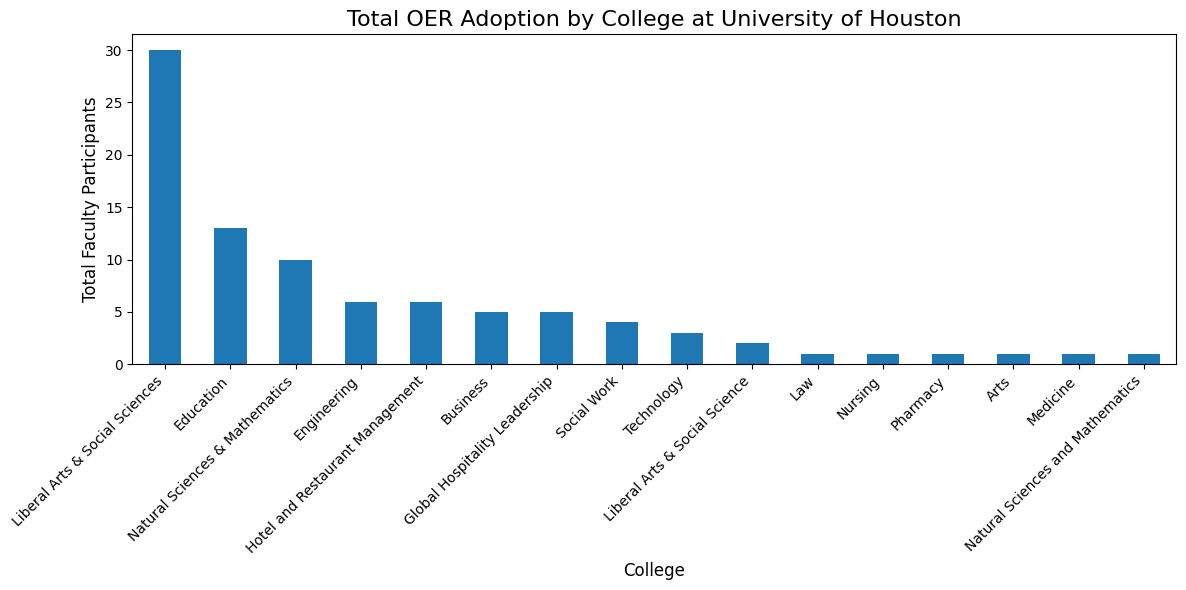

In [ ]:
# Visualization

import matplotlib.pyplot as plt

# Data for the visualization: Total participation by college
total_participation = final_df["College"].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
total_participation.plot(kind="bar")

# Add title and labels
plt.title("Total OER Adoption by College at University of Houston", fontsize=16)
plt.xlabel("College", fontsize=12)
plt.ylabel("Total Faculty Participants", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


## Final Thoughts: Insights from Health and Education

This notebook showcases the versatility of data engineering and analysis techniques in tackling challenges in health and education:

1. **Health and Nutrition Analysis:** Explored trends in health markers across demographics and activity levels, demonstrating the power of data cleaning, transformation, and visualization.
2. **OER Adoption in Education:** Extracted and analyzed unstructured web data to identify faculty participation trends in adopting OER materials.

### Broader Impact:
These projects highlight the role of data engineering in solving complex challenges. Whether improving health outcomes or advancing educational accessibility, the techniques demonstrated here enable data-driven decisions and meaningful progress.

### Future Directions:
- Expand health analyses to include additional metrics or longitudinal trends.
- Benchmark OER adoption across universities for broader insights.

Together, these case studies underscore how data engineering transforms raw data into actionable insights, fostering progress and practical applications.







------

## Appendix: Content for README.md

# Comprehensive Data Engineering and Analysis: Case Studies in Health and Education

## Overview
This repository showcases a data engineering notebook with two case studies:

1. **Health and Nutrition Analysis (NHANES Dataset):** Focused on data cleaning, transformation, and trend analysis of health markers.
2. **Web Scraping and OER Analysis:** Highlights web scraping and integration techniques to analyze faculty participation in Open Educational Resources (OER).

These projects demonstrate the application of data engineering and analysis techniques to extract actionable insights and support informed decision-making.

---

## Case Studies

### 1. **Health and Nutrition Analysis (NHANES Dataset)**
- **Focus:** Trends in BMI, glucose, and insulin across age groups and activity levels.
- **Highlights:**
  - Data cleaning and transformation (handling missing values, renaming columns, creating features).
  - Insights into demographic and activity-related health trends.

### 2. **Web Scraping and OER Analysis**
- **Focus:** Faculty adoption of OER at the University of Houston.
- **Highlights:**
  - Extracting and cleaning unstructured web data.
  - Identifying trends in faculty participation by college and year.

---

## Skills Demonstrated
- Data cleaning, transformation, and exploratory analysis.
- Creating actionable insights through clear visualizations.
- Web scraping and integration of unstructured data.



